Automatically created module for IPython interactive environment


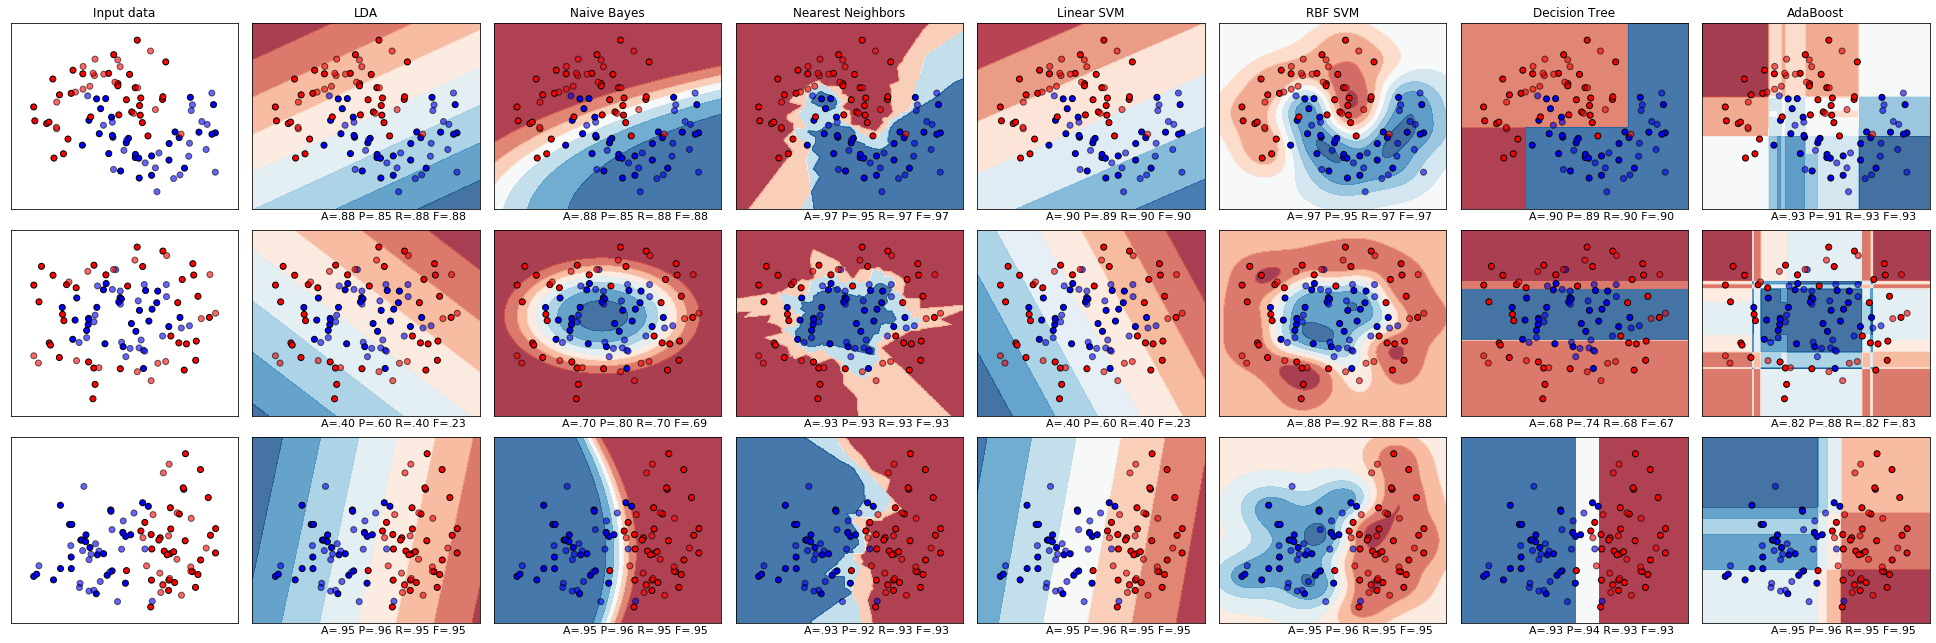

In [9]:
print(__doc__)

###############################     INSTALLATION/PREP     ################
# This is a DEMO to demonstrate classifiers 
#
#
# Might need to install the latest scikit-learn
# On linux or Mac: sudo pip install -U scikit-learn
#
# Codebase with more classifiers here: 
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

###############################     IMPORTS     ##########################

# numeric python and plotting
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# utility to help you split training data
from sklearn.model_selection import train_test_split
# utility to standardize data http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
# some dataset generation utilities. for example: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
from sklearn.datasets import make_moons, make_circles, make_classification

# Scoring for classifiers
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Classifiers from scikit-learn
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Bayesian
from sklearn.naive_bayes import GaussianNB
# kNN
from sklearn.neighbors import KNeighborsClassifier
# DT
from sklearn.tree import DecisionTreeClassifier
# SVM: linear and a kernel-SVM (you can read more about it in the SVM chapter)
from sklearn.svm import SVC
# AdaBoost classifier (we talked about it today)
from sklearn.ensemble import AdaBoostClassifier

###############################     CLASSIFIERS     #######################

# Put the names of the classifiers in an array to plot them
names = ["LDA",
         "Naive Bayes",
         "Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM",
         "Decision Tree",
         "AdaBoost"
         ]

# Create the classifiers with respective parameters
# LDA, NB: No parameters
# kNN:     k=3 for kNN (i.e. 3NN)
# SVM:     One linear and with C=0.025 and one RBF kernel-SVM with C=1
# DT :     Limit depth to 5 (i.e. at most 5 consecutive splits in each decision rule)
classifiers = [
    LinearDiscriminantAnalysis(),
    GaussianNB(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.25),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=2),
    AdaBoostClassifier()
    ]


###############################     DATASETS     ##########################

# prepare a linearly separable dataset http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
# add some noise to points
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
# call this our linearly separable dataset
linearly_separable = (X, y)

# put our datasets in an array
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]


###############################  TRAIN AND PLOT  ##########################

figure = plt.figure(figsize=(27, 9))
i = 1
# Iterate over datasets and train and plot each classifier
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset, split into training and test part
    X, y = ds
    # Standardize
    X = StandardScaler().fit_transform(X)
    # Splits our dataset in training and testing: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    
    # take the min and max for both dimensions to help us with plotting
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        # Prepare the plot for this classifier
        ax = plt.subplot(len(datasets), len(classifiers)+1, i)
        # Train the classifier (all classifiers in Scikit implement this functions)
        clf.fit(X_train, y_train)
        # Predict
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        ap = average_precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred, average='weighted') 
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        #score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() - .32, 'A=' + ('%.2f' % acc).lstrip('0') + ' P=' + ('%.2f' % ap).lstrip('0') + ' R=' + ('%.2f' % rec).lstrip('0') + ' F=' + ('%.2f' % f1).lstrip('0') ,
                size=11, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()